<a href="https://colab.research.google.com/github/AlexanderNaupa/Higienopolis/blob/main/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aqui, criamos um dicionário de têrmos (palavras) sobre o eBook em ingles no formato txt,  **The Time Machine** do H. G. Wells, obtenido sem fazer o download de um site na internet.  

1. A primeira célula obtém o texto na variável `texto`. 
Nesse caso, sendo a linguagem o idioma ingles, foi revisado o codigo para limpar os simbolos nao existentes no idioma portugues como o ’, entre outros, isto é uma pequena diferenca com o exemplo fornecido.
2. Na segunda célula cria o dicionário de têrmos com a estrutura:
 alem disso, ordenamos o diccionario em orden descendente, desde a palavra mais utilizada ate a menos utilizada.
```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```

3. A terceira célula apresenta um gráfico de distribuição dos têrmos do dicionário ordenado. Sao representadas as 100 palavras mais utilizadas para confirmar a lei de Zipf



## Aquisição dos Dados

In [11]:
import urllib.request

texto = []

for line in urllib.request.urlopen('https://www.gutenberg.org/files/35/35-0.txt'):                                     
    texto.append(line.decode('utf-8'))

# f = open('/kate_beckinsale.txt','r')    #  para arquivos locais
# for line in f:
#    texto.append(line)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','') #troca espaco por nada
    texto[i] = texto[i].replace('.','')  #limpa pontos
    texto[i] = texto[i].replace(',','')  #limpa virgulas
    texto[i] = texto[i].replace('(','')  #limpa parentesis
    texto[i] = texto[i].replace(')','')  #limpa parentesis
    texto[i] = texto[i].replace('?','')  #limpa interrogacao
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    texto[i] = texto[i].replace(':','')  #limpa dos pontos
    texto[i] = texto[i].replace('#','')  #limpa jogo da velha
    texto[i] = texto[i].replace('[','')  #limpa colchete
    texto[i] = texto[i].replace(']','')  #limpa colchete
    texto[i] = texto[i].replace('*','')  #limpa aquele simbolo
    texto[i] = texto[i].replace('-','')  #limpa aquele simbolo
    texto[i] = texto[i].replace('','')  #limpa aquele simbolo
    texto[i] = texto[i].replace('”','')  #limpa aquele simbolo
    texto[i] = texto[i].replace('“','')  #limpa aquele simbolo
    texto[i] = texto[i].replace('_','')  #limpa aquele simbolo
    texto[i] = texto[i].replace('!','')  #limpa aquele simbolo
    texto[i] = texto[i].replace('’','')  #limpa aquele simbolo
    texto[i] = texto[i].replace('/','')  #limpa aquele simbolo
    
   



# Construção do Dicionário

In [12]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente


# esa parte ordena o diccionario em forma descendente
mydict_ordenadinho = dict(sorted(mydict.items(), key=lambda item:item[1], 
reverse=True))
print(mydict_ordenadinho)

{'the': 2466, 'and': 1297, 'of': 1282, 'i': 1241, 'a': 863, 'to': 758, 'in': 606, 'was': 550, 'that': 448, 'my': 439, 'it': 430, 'had': 352, 'me': 276, 'as': 275, 'with': 263, 'at': 256, 'for': 242, 'time': 206, 'you': 205, 'but': 205, 'this': 198, 'or': 159, 'were': 157, 'on': 148, 'not': 142, 'from': 137, 'all': 133, 'then': 132, 'his': 129, 'have': 128, 'by': 125, 'is': 125, 'there': 123, 'they': 121, 'he': 120, 'so': 113, 'upon': 113, 'little': 113, 'into': 112, 'be': 111, 'one': 111, 'came': 107, 'no': 101, 'some': 95, 'could': 93, 'an': 91, 'their': 91, 'machine': 90, 'we': 89, 'said': 88, 'which': 88, 'saw': 88, 'down': 87, 'its': 87, 'very': 85, 'them': 85, 'project': 83, 'now': 78, 'about': 77, 'these': 76, 'what': 76, 'any': 75, 'been': 75, 'up': 74, 'her': 74, 'seemed': 72, 'out': 72, 'are': 70, 'if': 69, 'thing': 64, 'man': 64, 'like': 63, 'white': 61, 'our': 61, 'again': 60, 'more': 60, 'must': 59, 'would': 59, 'when': 57, 'traveller': 56, 'felt': 56, 'gutenbergtm': 56, 't

# Exibição dos Resultados

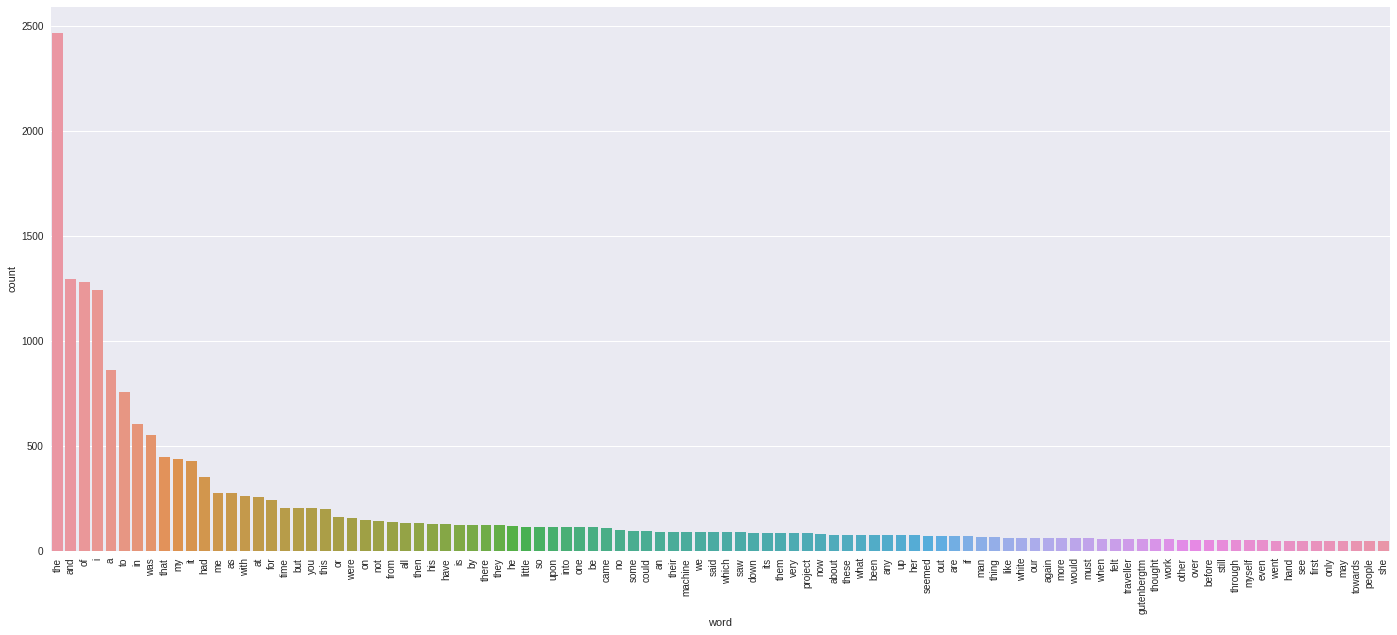

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
#df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
df = df.iloc[ 0 : 100] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()